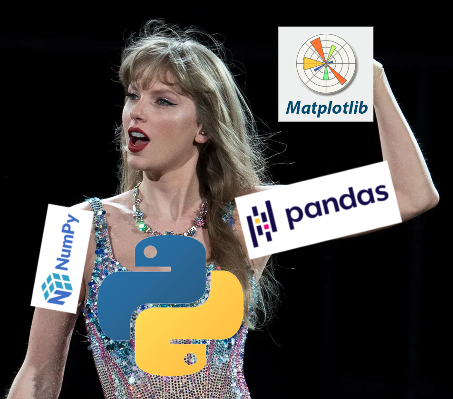

# Intro to Data Analysis in Python (Taylor's Version)

## Learning Objectives
- Why Pandas is useful 
- Use the Pandas package to read and explore the dataset
- Perform simple Pandas operations on the dataset
- Visualise the data using Matplotlib and Seaborn packages

## Why use Pandas?

### tl:dr 
Excel is great, but it doesn't scale well to large datasets. Pandas can, and it also allows superb reproducibility, repeatability and version control. Depends on the use case, both tools are good.

#### Scalability

Pandas: Can handle large datasets more efficiently than Excel, which can become slow or crash with very large files.<br>
Excel: Limited to handling smaller datasets due to memory and performance constraints.

#### Automation:

Pandas: Ideal for automating repetitive tasks with scripts, reducing manual effort and minimizing errors.<br>
Excel: Requires manual effort for many tasks, which can be time-consuming and prone to human error.

#### Reproducibility:

Pandas: Allows you to create reproducible data processing pipelines with code that can be shared and reused.<br>
Excel: Changes can be made manually without a clear record, making it harder to reproduce results.

####  Complex Data Transformations:

Pandas: Provides powerful functions and methods for complex data transformations and operations.<br>
Excel: Limited to the built-in functions and often requires complex formulas for advanced tasks.

####  Version Control:

Pandas: Code can be version controlled using tools like Git, making it easier to track changes and collaborate with others.<br>
Excel: Changes are tracked within the file, which can be difficult to manage and collaborate on in a controlled manner.

####  Data Cleaning and Preparation:

Pandas: Offers robust methods for cleaning and preparing data (e.g., handling missing values, merging datasets).<br>
Excel: Data cleaning can be more tedious and less efficient compared to using Pandas.

####  Data Analysis:

Pandas: Facilitates advanced data analysis with grouping, aggregations, pivoting, and statistical functions.<br>
Excel: Basic analysis is possible, but advanced analysis can become cumbersome.

####  Repeatability and Documentation:

Pandas: Code serves as documentation, showing exactly how data was transformed and analyzed.<br>
Excel: Transformations and analyses are less transparent, often embedded in cells without clear documentation.

####  Flexibility:

Pandas: Can handle various data formats (e.g., CSV, Excel, SQL databases, JSON) and supports complex data structures.<br>
Excel: Primarily focused on tabular data and limited in handling different data formats and structures.

## Dataset
This dataset consist of data from Spotify's API on all albums listed on Spotify for Taylor Swift.

<b>name</b>  - the name of the song <br>
<b>album</b>  - the name of the album <br>
<b>release_date</b>  - the day month and year the album was released<br>
<b>track number</b>  - the order the song appears on the album<br>
<b>id</b>  - the Spotify id for the song<br>
<b>uri</b>  - the Spotify uri for the song<br>
<b>acousticness</b>  - A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.<br>
<b>danceability</b>  - Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.<br>
<b>energy</b>  - Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. <br>
<b>instrumentalness</b>  - Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. <br>
<b>liveness</b>  - Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.<br>
<b>loudness</b>  - The overall loudness of a track in decibels (dB). <br>
<b>speechiness</b>  - Detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value.<br>
<b>tempo</b>  - The overall estimated tempo of a track in beats per minute (BPM).<br>
<b>valence</b>  - A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).<br>
<b>popularity</b>  - The popularity of the song from 0 to 100<br>
<b>duration_ms</b> - The duration of the track in milliseconds.<br>

## Documentation
https://pandas.pydata.org/docs/ <br>
https://numpy.org/doc/stable/index.html <br>
https://matplotlib.org/stable/index.html <br>
https://seaborn.pydata.org/index.html <br>
https://www.kaggle.com/datasets/jarredpriester/taylor-swift-spotify-dataset/data <br>

## Exercise 1: Load and Inspect the Data

In [ ]:
# Import the packages for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [ ]:
# Read in the CSV, assign it to the 'df' variable
df = pd.read_csv('taylor_swift_spotify_edited.csv')

In [ ]:
# Take a look at the top (head) of the dataframe
df.head()

In [ ]:
# Check some descriptive statistics of the dataset (numerical columuns)
df.describe()

In [ ]:
# Show some basic info about the dataset - 207 rows, 17 columns, mostly floats i.e 0.5, doesn't seem to be any obvious null values
df.info()

In [ ]:
# Check the number of songs per album, assign to the album_counts variable
album_counts = df['album'].value_counts()
print(album_counts)

#### Exercise 2: Data Cleaning

In [ ]:
# Keep the dataset in view so we can remember the columns
df.head(1)

In [ ]:
# Convert release date to a nice date format, and create a more intuitive duration column
df['release_date'] = pd.to_datetime(df['release_date'], format='mixed')
df['duration_minutes'] = df['duration_ms'] / 60000

In [ ]:
# Sort the dataframe by release date and track number, see the index (1st column, no header) isn't in order now, so we'll reset that further down
df = df.sort_values(by=['release_date','track_number'], ascending=True)
df.head()

In [ ]:
# Drop the spotify ID, URI and duration_ms, don't think we'll need them for this analysis, and reset the index
df = df.drop(['id','uri','duration_ms'],axis=1)
df = df.reset_index(drop=True)
df.head()

### Exercise 3: Random Pandas Operation

`groupby` is like an excel pivot table

In [ ]:
# Group by 'album' and calculate the mean popularity for each album
df.groupby('album')['popularity'].mean().reset_index().sort_values(by='popularity', ascending=False).reset_index(drop=True)

In [ ]:
# Group by 'album' and calculate the mean energy for each album
df.groupby('album')['energy'].mean().reset_index().sort_values(by='energy', ascending=False).reset_index(drop=True)

In [ ]:
# Group by 'album' and calculate the mean acousticness for each album
df.groupby('album')['acousticness'].mean().reset_index().sort_values(by='acousticness', ascending=False).reset_index(drop=True)

### Exercise 4: EDA

In [ ]:
# Create a list of numerical columns to use later
numerical_columns = df.select_dtypes(include='number').columns.tolist()

# Remove 'track_number' from the list, it's not really useful information for visuals
numerical_columns.remove('track_number')
numerical_columns

In [ ]:
variances = df[numerical_columns].var().sort_values()
variances

In [ ]:
threshold = 0.01
numerical_columns = variances[variances > threshold].index.tolist()
numerical_columns

In [ ]:
# Create a correlation matrix of all the numerical features
correlation_matrix = df[numerical_columns].corr()

# Plot it
plt.figure(figsize=(10, 8)) # controls the size of the plot
sns.heatmap(correlation_matrix, annot=True, cmap='crest', fmt='.2f', linewidths=0.5) # plot the heatmap from the Seaborn package
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

# Darker squares are more positively correlated, lighter squares are more negatively correlated
# Acousticness negatively correlated with energy, which makes sense - as acoutsticness goes up, energy goes down
# Loudness is positively correlated with energy - as loudness goes up, so does energy

In [ ]:
# We can see the above correlations in more detail below - takes about 25 seconds to run, doing a lot under the hood
sns.pairplot(df[numerical_columns], diag_kind='kde')
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()

In [ ]:
# Plot Loudness across albums - as we've ordered the dataset by release date, it's sort of like a time series
plt.figure(figsize=(8, 8))
sns.boxplot(data=df, x='album', y='loudness', palette="crest", hue='album')
plt.title('Loudness Distribution Across Albums')
plt.ylabel('Loudness (dB)')
plt.xticks(rotation=90)
plt.show()

In [ ]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=df, x='album', y='valence', palette='crest', hue='album')
plt.title('Positivity Across Albums')
plt.ylabel('Positivity')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Violin plot to show distribution of Popularity across different albums
plt.figure(figsize=(10, 8))
sns.violinplot(data=df, x='album', y='popularity', palette='crest', density_norm='width', hue='album')
plt.title('Popularity Distribution Across Albums')
plt.xlabel('Album')
plt.ylabel('Popularity')
plt.xticks(rotation=90)
plt.show()

### Exercise 5: Modelling

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [ ]:
grouped_df = df.groupby('album')[numerical_columns].mean().reset_index()
grouped_df

In [ ]:
# Initialize the scaler
scaler = StandardScaler()

# Features and target
features = ['danceability', 'energy', 'valence', 'acousticness', 'duration_minutes', 'loudness', 'tempo']
target = 'popularity'

# Scale the features
grouped_df[features] = scaler.fit_transform(grouped_df[features])

# Assume 'TTPS' is the last album we want to predict
train_df = grouped_df[grouped_df['album'] != 'THE TORTURED POETS DEPARTMENT']
test_df = grouped_df[grouped_df['album'] == 'THE TORTURED POETS DEPARTMENT']

In [ ]:
X_train = train_df[features]
X_train

In [ ]:
y_train = train_df[target]
y_train

In [ ]:
X_test = test_df[features]
X_test

In [ ]:
y_test = test_df[target]
y_test

In [ ]:
# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
results